# Example of match data analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
PLAYER_SID = 1572500566 # MDZ_Jimmy

file_name = f"player_{PLAYER_SID}_sf6_matches.xlsx"

In [3]:
data = pd.read_excel(file_name)
data["left_side"] = data["left_side"].map({0: "Right side", 1: "Left Side"})

last_day = data["uploaded_at"].max().date()

df_last_session = data[data["uploaded_at"].map(lambda d: str(d.date()) == str(last_day))]
data.head(n=5)

,main_player_name,main_player_sid,main_player_character,main_player_score,main_player_league_rank,main_player_lp,main_player_mr,main_player_mr_ranking,main_player_input_type,main_player_platform,opposite_player_name,opposite_player_sid,opposite_player_character,opposite_player_score,opposite_player_league_rank,opposite_player_lp,opposite_player_mr,opposite_player_mr_ranking,opposite_player_input_type,opposite_player_platform,match_won,left_side,uploaded_at,replay_id,replay_battle_type_name
0,MDZ_jimmY,1572500566,Ryu,1,36,379275,1778,2202,0,Steam,Modern Walking,3458572950,Dhalsim,2,36,67919,1597,2202,0,Steam,0,Right side,2025-02-16 20:42:22,NXNQ93T69,Ranked Match
1,MDZ_jimmY,1572500566,Ryu,1,36,379315,1790,2028,0,Steam,Modern Walking,3458572950,Dhalsim,2,36,67669,1585,2028,0,Steam,0,Right side,2025-02-16 20:39:44,4KKMGUVYE,Ranked Match
2,MDZ_jimmY,1572500566,Ryu,2,36,379195,1781,2149,0,Steam,Joxero,4032278107,JP,1,36,386241,1841,2149,0,Steam,1,Right side,2025-02-16 20:36:36,PBRYXJT8L,Ranked Match
3,MDZ_jimmY,1572500566,Ryu,2,36,379073,1771,2337,0,Steam,Joxero,4032278107,JP,0,36,386281,1851,2337,0,Steam,1,Right side,2025-02-16 20:33:52,UTSQX4T7S,Ranked Match
4,MDZ_jimmY,1572500566,Ryu,2,36,379023,1764,2492,0,Steam,MigBee,2832147557,Jamie,1,36,193778,1699,2492,0,Steam,1,Right side,2025-02-16 20:30:33,KC3XQ3DHD,Ranked Match


In [4]:
def match_reports(df):
    
    sep = "\n" + 20 * "-" + "\n"
    
    print("Number of matches:", len(df), end=sep)
    
    pie_chart_format_high = lambda x: f"{round(x / 100 * len(df))}"
    pie_chart_format_low = lambda x: f"{round(x / 100 * len(df))} ({round(x, 2)} %)"
    
    
    
    for col in ["match_won", "replay_battle_type_name", "opposite_player_character", "left_side"]:
        pie_chart_format = pie_chart_format_high if col == "opposite_player_character" else pie_chart_format_low
        plt.figure()
        df[col].value_counts().plot.pie(
            autopct=pie_chart_format,
            figsize=(8, 6)
        )
        plt.title(col)
        plt.ylabel(None)
        
    print("% of match won", round(df["match_won"].mean() * 100, 2), "%", end=sep)
    print(df[["left_side", "match_won"]].groupby("left_side").mean(), end=sep)
    print(df[["opposite_player_character", "match_won"]].groupby("opposite_player_character").mean(), end=sep)
    
    print("Highest MR", df['main_player_mr'].max(), end=sep)
    print("Highest World Ranking", df['main_player_mr_ranking'].min(), end=sep)

    highest_winstreak = max(len(seq) for seq in "".join(df["match_won"].map(str)).split("0"))

    print("Highest winstreak (assuming no gap in match saved):", highest_winstreak, end=sep)
    
    df_ranked = df[df["replay_battle_type_name"] == "Ranked Match"]

    plt.figure(figsize=(8, 6))

    plt.plot(df_ranked["main_player_mr"], label="Main Player MR")
    plt.plot(df_ranked["opposite_player_mr"], label="Opposite Player MR")

    plt.grid(True)
    plt.legend()
    plt.xlabel("Match")
    plt.ylabel("MR")
    plt.title("Ranked matches MR Evolution")

## Latest session stats

Number of matches: 69
--------------------
% of match won 62.32 %
--------------------
            match_won
left_side            
Left Side    0.750000
Right side   0.571429
--------------------
                           match_won
opposite_player_character           
A.K.I.                      0.200000
Akuma                       0.000000
Cammy                       0.800000
Chun-Li                     1.000000
Dhalsim                     0.000000
Edmond Honda                1.000000
Guile                       0.333333
JP                          0.666667
Jamie                       0.700000
Juri                        0.666667
Ken                         1.000000
Kimberly                    0.571429
Lily                        0.714286
Luke                        1.000000
M. Bison                    1.000000
Mai                         0.600000
Manon                       0.000000
Zangief                     1.000000
--------------------
Highest MR 1790
--------------------
Highes

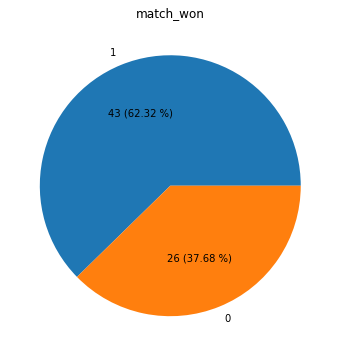

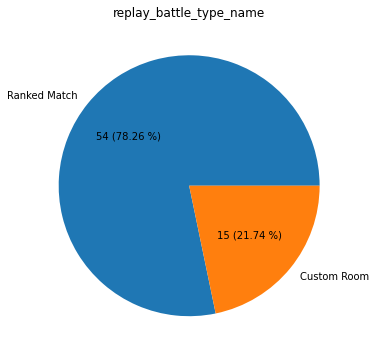

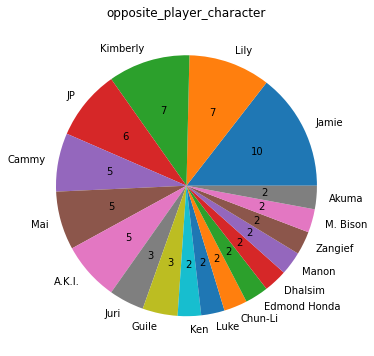

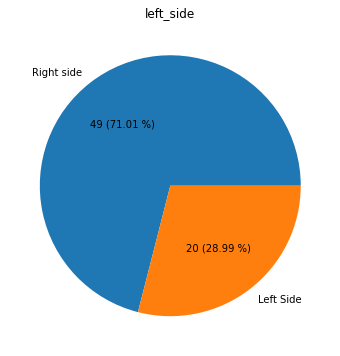

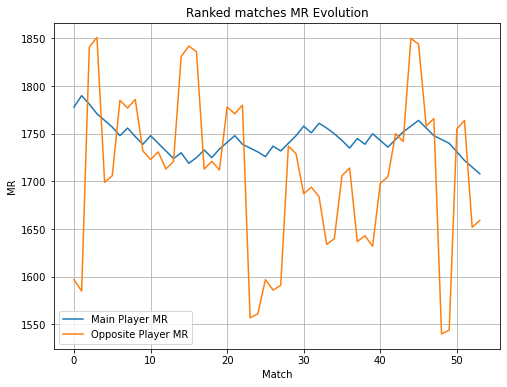

In [5]:
match_reports(df_last_session)

## Total matches stats

Number of matches: 141
--------------------
% of match won 54.61 %
--------------------
            match_won
left_side            
Left Side    0.591837
Right side   0.521739
--------------------
                           match_won
opposite_player_character           
A.K.I.                      0.142857
Akuma                       0.428571
Cammy                       0.533333
Chun-Li                     1.000000
Dee Jay                     0.333333
Dhalsim                     0.384615
Ed                          0.000000
Edmond Honda                0.571429
Guile                       0.333333
JP                          0.583333
Jamie                       0.583333
Juri                        0.666667
Ken                         0.857143
Kimberly                    0.444444
Lily                        0.714286
Luke                        1.000000
M. Bison                    1.000000
Mai                         0.714286
Manon                       0.000000
Marisa                    

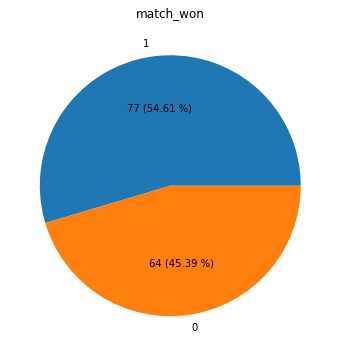

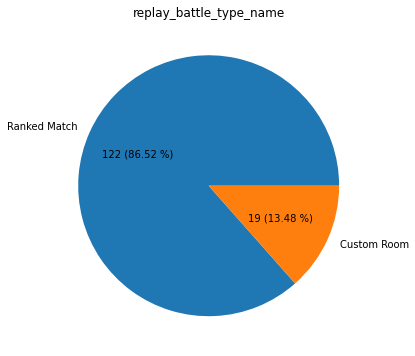

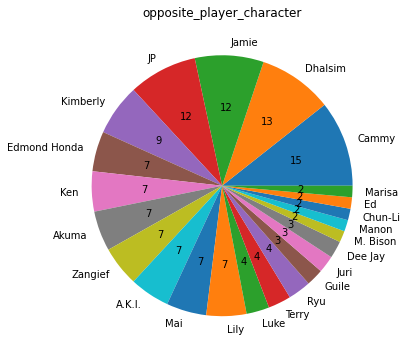

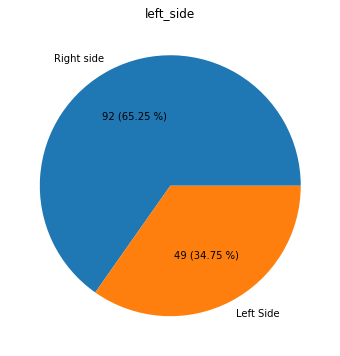

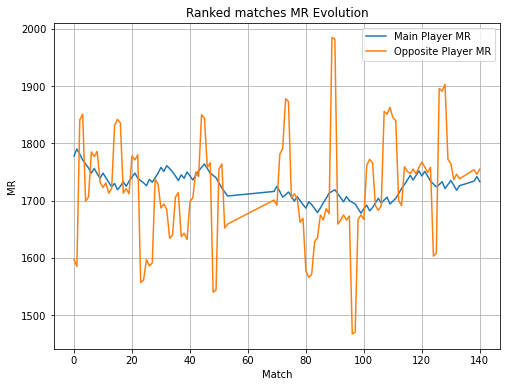

In [6]:
match_reports(data)